# Table of Contents
 <p>

In [1]:
from __future__ import division, print_function
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.8485,  0.948 ,  0.9562,  0.4461,  0.6607,  0.2173,  0.8311,  0.9788,  0.0485,  0.6785,
        0.9612,  0.3156,  0.4165,  0.3338,  0.2931,  0.0057,  0.7664,  0.9951,  0.6925,  0.6247,
        0.5628,  0.0956,  0.3693,  0.2276,  0.0242,  0.5822,  0.7983,  0.6739,  0.2812,  0.1929])

In [6]:
y

array([ 10.5455,  10.8441,  10.8685,   9.3384,   9.9821,   8.6519,  10.4932,  10.9363,   8.1455,
        10.0355,  10.8835,   8.9469,   9.2495,   9.0015,   8.8794,   8.017 ,  10.2993,  10.9852,
        10.0775,   9.8742,   9.6883,   8.2869,   9.108 ,   8.6829,   8.0726,   9.7466,  10.3949,
        10.0218,   8.8435,   8.5788])

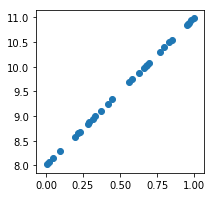

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1941

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani